In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

### Importing the dataset

In [44]:
df_encoding="ISO-8859-1"
df_columns=["sentiment", "ids", "date", "flag", "user", "text"]
df=pd.read_csv('training.1600000.processed.noemoticon.csv',encoding=df_encoding,names=df_columns)

In [45]:
df.head()

,sentiment,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
df.tail()

,sentiment,ids,date,flag,user,text
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [5]:
# Removing unnecessary attributes and selecting only the useful ones.
df=df[['sentiment','text']]

In [6]:
# Here we have two labels in the sentiment column 
# 0 for negative and 4 for positive so we replace 4 by 1 for ease in understanding and computation
df['sentiment']=df['sentiment'].replace(4,1)

[Text(0, 0, 'Negative'), Text(0, 0, 'Positive')]

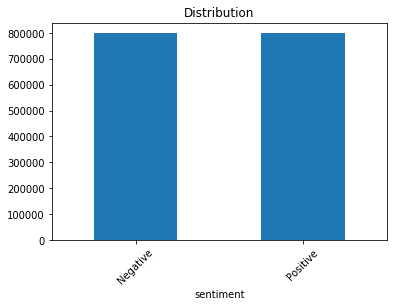

In [7]:
# Plotting the distribution for dataset.
ax = df.groupby('sentiment').count().plot(kind='bar', title='Distribution',
                                               legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=45)

### Preprocessing

In [8]:
stopword=['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [9]:
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer

In [10]:
# we need to take care of emojis also.
emojis={':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
'@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
'<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

#### Writing a function to preprocess the text

In [11]:
def preprocess(text):
    p_text=[]
    wordlem=WordNetLemmatizer()
    a_p='[^a-zA-Z0-9]'
    u_p='@[^s]+'
    url_p=r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    for tweet in text:
        tweet = tweet.lower()
        tweet = re.sub(url_p,' URL',tweet)
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])        
        tweet = re.sub(u_p,' USER', tweet)        
        tweet = re.sub(a_p, " ", tweet)
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)
        tweetwords = ''
        for word in tweet.split():
            if len(word)>1:
                word = wordlem.lemmatize(word)
                tweetwords += (word+' ')
            
        p_text.append(tweetwords)
    return text

In [12]:
# Now preprocess the text
# Storing data in lists.
text, sentiment = list(df['text']), list(df['sentiment'])
import time
t=time.time()
p_text=preprocess(text)
print(f'Text Preprocessing complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')

Text Preprocessing complete.
Time Taken: 261 seconds


#### Analysis of the data

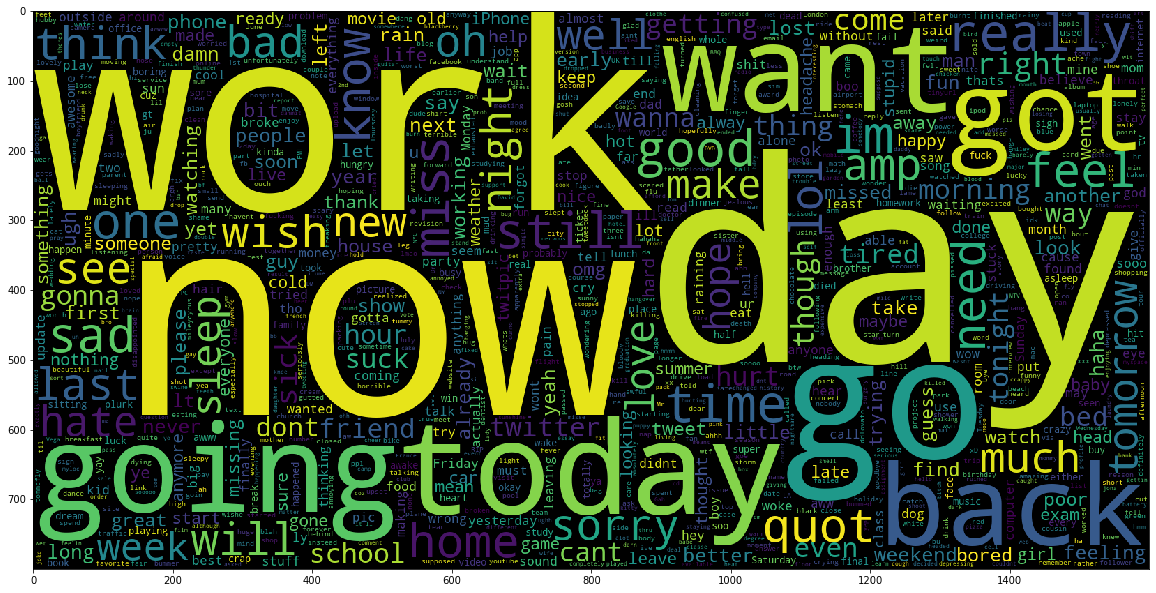

In [13]:
#negative tweets word cloud
negative_data = p_text[:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(negative_data))
plt.imshow(wc)

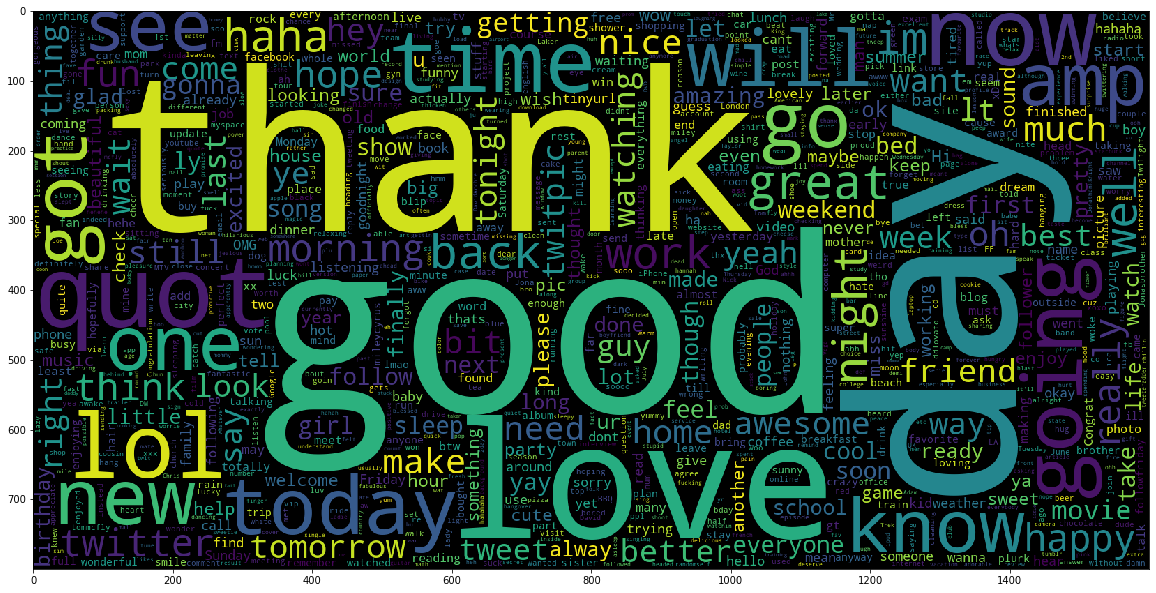

In [14]:
#positive tweets word cloud
positive_data = p_text[800000:]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(positive_data))
plt.imshow(wc)

#### Now the analysis is complete we will do modelling

In [15]:
# splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(p_text, sentiment,test_size = 0.05)

In [16]:
# Using the TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect=TfidfVectorizer(ngram_range=(1,2),max_features=500000)
vect.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0,
                max_features=500000, min_df=1, ngram_range=(1, 2), norm='l2',
                preprocessor=None, smooth_idf=True, stop_words=None,
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)

In [17]:
# transforming the dataset
X_train=vect.transform(X_train)
X_test=vect.transform(X_test)

#### Creating models and their evaluation


In [18]:
# importing necessary libraries
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

##### Evaluate model fuction

In [19]:
def evaluate(model):
    y_pred=model.predict(X_test)
    c=confusion_matrix(y_test,y_pred)
    print(classification_report(y_test,y_pred))
    g_name=['True -ve','False +ve','False -ve','True +ve']
    cat=['Negative','Positive',]
    percentage=['{0:.02}'.format(i) for i in c.flatten()/np.sum(c)]
    label=[f'{v1}\n{v2}' for v1,v2 in zip(g_name,percentage)]
    label=np.asarray(label).reshape(2,2)
    ax=sns.heatmap(c,annot=label,cmap='Blues',fmt = '',xticklabels=cat,yticklabels=cat)
    bottom,top=ax.get_ylim()
    ax.set_ylim(bottom+0.5,top-0.5)
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    

##### Applying different models

C:\Users\aksha\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aksha\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


              precision    recall  f1-score   support

           0       0.83      0.82      0.83     40149
           1       0.82      0.84      0.83     39851

    accuracy                           0.83     80000
   macro avg       0.83      0.83      0.83     80000
weighted avg       0.83      0.83      0.83     80000



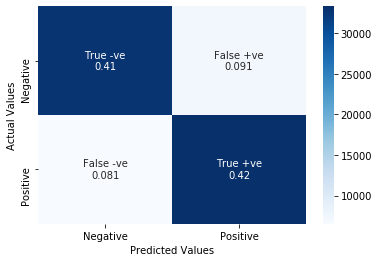

In [20]:
# Logistic Regression
lr=LogisticRegression(C=2,max_iter=1000,n_jobs=-1)
lr.fit(X_train,y_train)
evaluate(lr)

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     40149
           1       0.79      0.81      0.80     39851

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



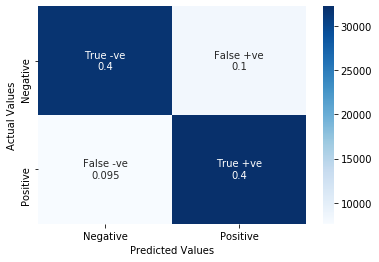

In [21]:
B_nb = BernoulliNB(alpha = 2)
B_nb.fit(X_train, y_train)
evaluate(B_nb)

##### Saving the models

In [24]:
import pickle
file=open('Vectorizer-ngram-(1,2).pickle','wb')
pickle.dump(vect,file)
file.close()

In [27]:
file=open('Sentiment Analyser-Bnb.pickle','wb')
pickle.dump(B_nb,file)
file.close()

In [26]:
file=open('Sentiment Analyser-LR.pickle','wb')
pickle.dump(lr,file)
file.close()

#### Using the model on sample text

In [47]:
file1=open('Vectorizer-ngram-(1,2).pickle','rb')
vect=pickle.load(file1)
file1.close()

In [48]:
vect

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0,
                max_features=500000, min_df=1, ngram_range=(1, 2), norm='l2',
                preprocessor=None, smooth_idf=True, stop_words=None,
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)

In [49]:
file2=open('Sentiment Analyser-LR.pickle','rb')
lr_m=pickle.load(file2)
file2.close()

In [50]:
lr_m

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
def predict(vectoriser, model, text):
    # Predict the sentiment
    textdata = vectoriser.transform(preprocess(text))
    sentiment = model.predict(textdata)
    data_test = []
    for text, pred in zip(text, sentiment):
        data_test.append((text,pred))
        
    
    ans = pd.DataFrame(data_test, columns = ['text','sentiment'])
    ans = ans.replace([0,1], ["Negative","Positive"])
    return ans
# Here in the list text one can give any number of text samples.
if __name__=="__main__":
    text = ["Whats'up",
            "Go to hell",
            "I love her very much"]
    
    answer = predict(vect, lr_m, text)
    print(answer.head())

                   text sentiment
0              Whats'up  Positive
1            Go to hell  Negative
2  I love her very much  Positive
